In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [4]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 3s 199us/step - loss: 0.5098 - acc: 0.7804 - val_loss: 0.3825 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.3012 - acc: 0.9039 - val_loss: 0.2994 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2161 - acc: 0.9287 - val_loss: 0.3079 - val_acc: 0.8725
Epoch 4/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1728 - acc: 0.9436 - val_loss: 0.2836 - val_acc: 0.8846
Epoch 5/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1395 - acc: 0.9552 - val_loss: 0.2854 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1119 - acc: 0.9658 - val_loss: 0.3103 - val_acc: 0.8800
Epoch 7/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0943 - acc: 0.9721 - val_loss: 0

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

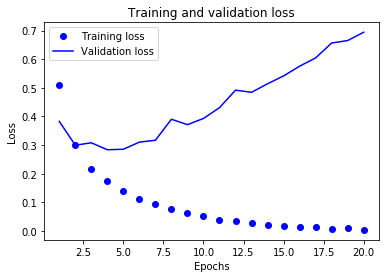

In [13]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

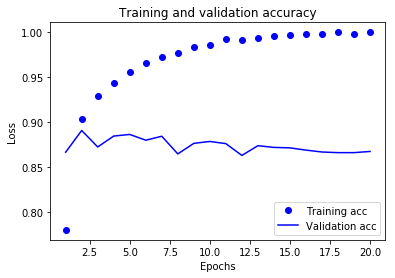

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.4986 - acc: 0.7878 - val_loss: 0.3870 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.3135 - acc: 0.9027 - val_loss: 0.3209 - val_acc: 0.8807
Epoch 3/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.2419 - acc: 0.9247 - val_loss: 0.2912 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1994 - acc: 0.9394 - val_loss: 0.2834 - val_acc: 0.8858
Epoch 5/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1675 - acc: 0.9498 - val_loss: 0.2790 - val_acc: 0.8875
Epoch 6/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1467 - acc: 0.9559 - val_loss: 0.2757 - val_acc: 0.8876
Epoch 7/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1271 - acc: 0.9630 - val_loss: 0.2915 - 

In [33]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.4755 - acc: 0.7997 - val_loss: 0.3506 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2718 - acc: 0.9026 - val_loss: 0.2943 - val_acc: 0.8844
Epoch 3/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1976 - acc: 0.9304 - val_loss: 0.3788 - val_acc: 0.8457
Epoch 4/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1585 - acc: 0.9469 - val_loss: 0.3445 - val_acc: 0.8662
Epoch 5/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1219 - acc: 0.9579 - val_loss: 0.2941 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1002 - acc: 0.9662 - val_loss: 0.3426 - val_acc: 0.8806
Epoch 7/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.0830 - acc: 0.9731 - val_loss: 0.3440 - 

In [34]:
model4 = models.Sequential()
model4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.4877 - acc: 0.7703 - val_loss: 0.3442 - val_acc: 0.8585
Epoch 2/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.2683 - acc: 0.8956 - val_loss: 0.3067 - val_acc: 0.8769
Epoch 3/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.1827 - acc: 0.9327 - val_loss: 0.2984 - val_acc: 0.8813
Epoch 4/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1388 - acc: 0.9517 - val_loss: 0.3062 - val_acc: 0.8826
Epoch 5/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.1103 - acc: 0.9621 - val_loss: 0.3479 - val_acc: 0.8728
Epoch 6/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.0871 - acc: 0.9706 - val_loss: 0.3429 - val_acc: 0.8837
Epoch 7/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.0580 - acc: 0.9805 - val_loss: 0.3772 - 

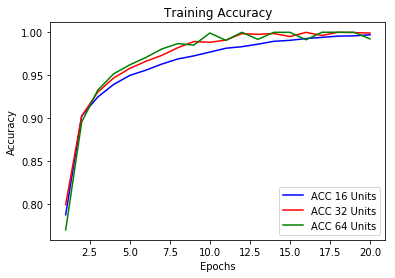

In [35]:
history_dict1 = history1.history
history_dict1.keys()
history_dict2 = history2.history
history_dict2.keys()
history_dict4 = history4.history
history_dict4.keys()


plt.clf()   # clear figure
acc_values1 = history_dict1['acc']
acc_values2 = history_dict2['acc']
acc_values4 = history_dict4['acc']


epochs = range(1, len(acc_values1) + 1)


plt.plot(epochs, acc_values1, 'b', label='ACC 16 Units')
plt.plot(epochs, acc_valuesa2, 'r', label='ACC 32 Units')
plt.plot(epochs, acc_values4, 'g', label='ACC 64 Units')

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()